In [1]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import use
%matplotlib inline

import contextlib
with contextlib.redirect_stdout(None):
    np.seterr(divide = 'ignore')

# Ejercicio:

$$ f(x, y) = 2 \pi x  y + 2 \pi x^2 $$
$$ p = (80, 100) $$

In [2]:
fx = lambda x, y: 2 * np.pi * (x * y + x**2)
p1 = (80, 100)

fx_dx = lambda x, y: 2 * np.pi * y + 4 * np.pi * x
fx_dy = lambda x, y: 2 * np.pi * x

grad_fx = lambda x, y: np.array([[fx_dx(x, y), fx_dy(x, y)]])

H1 = np.array([
    [4 * np.pi,  2 * np.pi],
    [2 * np.pi,  0]
])

fx_apx_l = lambda x, y, p: fx(*p) + grad_fx(*p)[0, 0] * (x - p[0]) + grad_fx(*p)[0, 1] * (y - p[1])
fx_apx_q = lambda x, y, p: fx_apx_l(x, y, p) + np.dot(np.dot(np.array([[x - p[0], y - p[1]]]), H1), np.array([[x - p[0]], [y - p[1]]])).flat[0] / 2

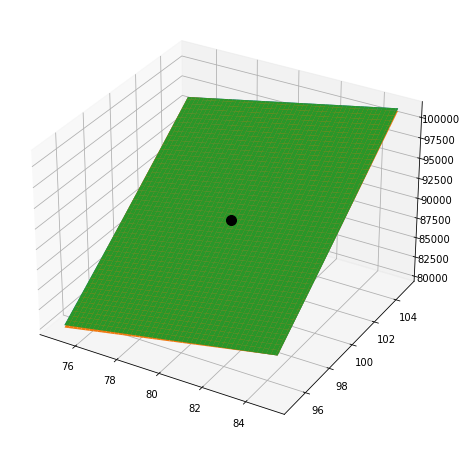

In [3]:
x1 = np.linspace(75, 85, 100)
y1 = np.linspace(95, 105, 100)

[size_x1] = x1.shape
[size_y1] = y1.shape

X1, Y1 = np.meshgrid(x1, y1)
Z1 = np.array([fx(x, y) for x in x1 for y in y1]).reshape((size_y1, size_x1))
Z1_apx_l = np.array([fx_apx_l(x, y, p1) for x in x1 for y in y1]).reshape((size_y1, size_x1))
Z1_apx_q = np.array([fx_apx_q(x, y, p1) for x in x1 for y in y1]).reshape((size_y1, size_x1))

plt.figure(figsize=(16, 8))
axes = plt.axes(projection = '3d')
axes.plot_surface(X1, Y1, Z1)
axes.plot_surface(X1, Y1, Z1_apx_l)
axes.plot_surface(X1, Y1, Z1_apx_q)
axes.plot(p1[0], p1[1], fx(*p1), marker='o', markersize=10, zorder=13, color='black')
axes.autoscale_view
plt.show()

# Ejercicio #2:

$$ f(x, y) = 3y - \frac {x} {y} $$
$$ p = (2, 1) $$

In [4]:
f2x = lambda x, y: 3 * y - x / y
p2 = (2, 1)

f2x_dx = lambda x, y: -1 / y
f2x_dy = lambda x, y: 3 + x / y**2

grad_f2x = lambda x, y: np.array([[f2x_dx(x, y), f2x_dy(x, y)]])

H2 = lambda x, y: np.array([
    [0,  1 / y**2],
    [1 / y**2,  -2 * x / y**3]
])

f2x_apx_l = lambda x, y, p: f2x(*p) + np.dot(grad_f2x(*p), np.array([x - p[0], y - p[1]])).flat[0]
f2x_apx_q = lambda x, y, p: f2x_apx_l(x, y, p) + np.dot(np.dot(np.array([[x - p[0], y - p[1]]]), H2(*p)), np.array([[x - p[0]], [y - p[1]]])).flat[0] / 2

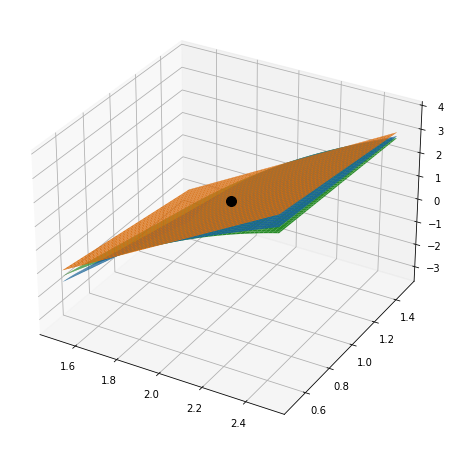

In [5]:
x2 = np.linspace(1.5, 2.5, 100)
y2 = np.linspace(0.5, 1.5, 100)

[size_x2] = x2.shape
[size_y2] = y2.shape

X2, Y2 = np.meshgrid(x2, y2)
Z2 = np.array([f2x(x, y) for x in x2 for y in y2]).reshape((size_y2, size_x2))
Z2_apx_l = np.array([f2x_apx_l(x, y, p2) for x in x2 for y in y2]).reshape((size_y2, size_x2))
Z2_apx_q = np.array([f2x_apx_q(x, y, p2) for x in x2 for y in y2]).reshape((size_y2, size_x2))

plt.figure(figsize=(16, 8))
axes = plt.axes(projection = '3d')
axes.plot_surface(X2, Y2, Z2)
axes.plot_surface(X2, Y2, Z2_apx_l)
axes.plot_surface(X2, Y2, Z2_apx_q)
axes.plot(p2[0], p2[1], f2x(*p2), marker='o', markersize=10, zorder=13, color='black')
plt.show()

In [6]:
A = np.array([
    ['a', 'b', 'c'],
    ['d', 'e', 'f'],
    ['g', 'h', 'i']
])

print(A[:, :2])

[['a' 'b']
 ['d' 'e']
 ['g' 'h']]
